Connected to MySQL Server version  8.0.28
insert into transactions(bank_transaction, accumulate, memory, time_elapsed, exec_date) values (%s, %s, %s, %s, %s);
ok
insert into transactions(bank_transaction, accumulate, memory, time_elapsed, exec_date) values (%s, %s, %s, %s, %s);
ok
insert into transactions(bank_transaction, accumulate, memory, time_elapsed, exec_date) values (%s, %s, %s, %s, %s);
ok
insert into transactions(bank_transaction, accumulate, memory, time_elapsed, exec_date) values (%s, %s, %s, %s, %s);
ok
insert into transactions(bank_transaction, accumulate, memory, time_elapsed, exec_date) values (%s, %s, %s, %s, %s);
ok
MySQL connection is closed


Text(0, 0.5, 'Memoria')

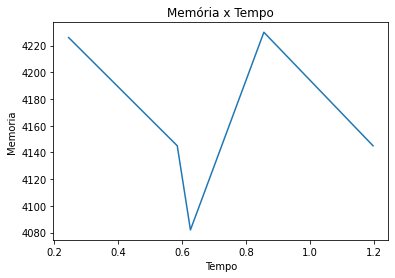

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import tracemalloc
import mysql.connector as mysql
from mysql.connector import Error


def soma_tempo(n):
    tracemalloc.start()
    
    dt_inicio = datetime.now()
    end_date = 0
    accumulator = 0
    
    
    for i in range(1, n+1):
        accumulator += i
    end_date = datetime.now()
    memory = tracemalloc.get_traced_memory()[1] # segundo elemento representa o pico da memoria
    time = (end_date - dt_inicio).total_seconds()
    retorno = { 
        'bank_transaction': memory, 
        'accumulate': n,
        'memory': memory,
        'time_elapsed': time,
        'exec_date': datetime.now(),
    }
    tracemalloc.stop()
    tracemalloc.clear_traces()
    return retorno

try:
    connection = mysql.connect(
        host = 'localhost',
        database = 'measures',
        user = 'root',
        password = 'algas123'
    )
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()

        valores = []
        for valor in range(100000, 600000, 100000):
            current = soma_tempo(valor)
            
            query = "insert into transactions(bank_transaction, accumulate, memory, time_elapsed, exec_date) values (%s, %s, %s, %s, %s);"
            query_data = (current['bank_transaction'], current['accumulate'], current['memory'], current['time_elapsed'], current['exec_date'])
            print(query)
            cursor.execute(query, query_data)
            connection.commit()
            print("ok")
            valores.append(current)

        plt.plot(
            np.array([item['time_elapsed'] for item in valores]),
            np.array([item['memory'] for item in valores]),
        )
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
    print("MySQL connection is closed")



# a)
plt.title('Memória x Tempo')
plt.xlabel('Tempo')
plt.ylabel('Memoria')
